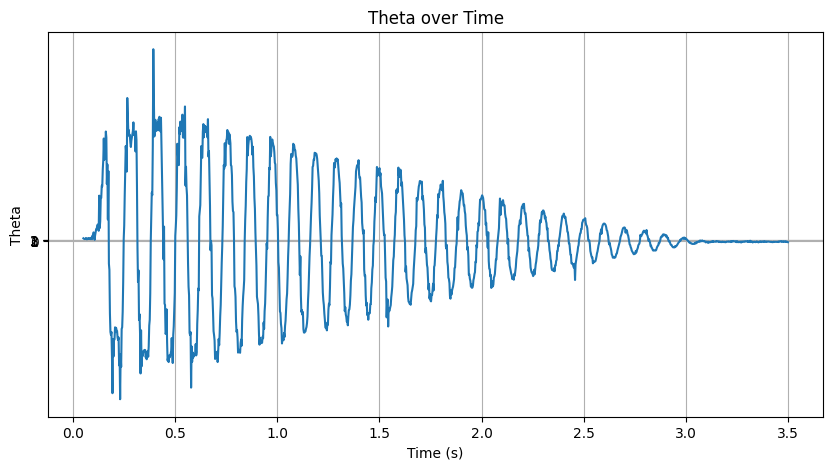

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Path to the CSV file
csv_file_path = 'datasets/other/updated_data.csv'

# Read the data from the CSV file
df = pd.read_csv(csv_file_path)

# Convert 'time' from milliseconds to seconds for plotting
df['time_seconds'] = df['time'] / 1000

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df['time_seconds'], df['theta'])
plt.xlabel('Time (s)')
plt.ylabel('Theta')
plt.title('Theta over Time')
plt.grid(True)

# Set the y-axis labels to display every second
plt.yticks(range(0, int(df['time_seconds'].max()) + 1, 1))

# Show the plot
plt.show()
